In [1]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
import glob
from keras.preprocessing import image
from sklearn.cluster import KMeans
from skimage.feature import hog
from skimage import exposure
from skimage.measure import label
import random
import copy

C:\Users\User\AppData\Local\Programs\Python\Python38\lib\site-packages\skimage\_shared\utils.py:338: FutureWarning: `multichannel` is a deprecated argument name for `hog`. It will be removed in version 1.0.Please use `channel_axis` instead.
  return func(*args, **kwargs)


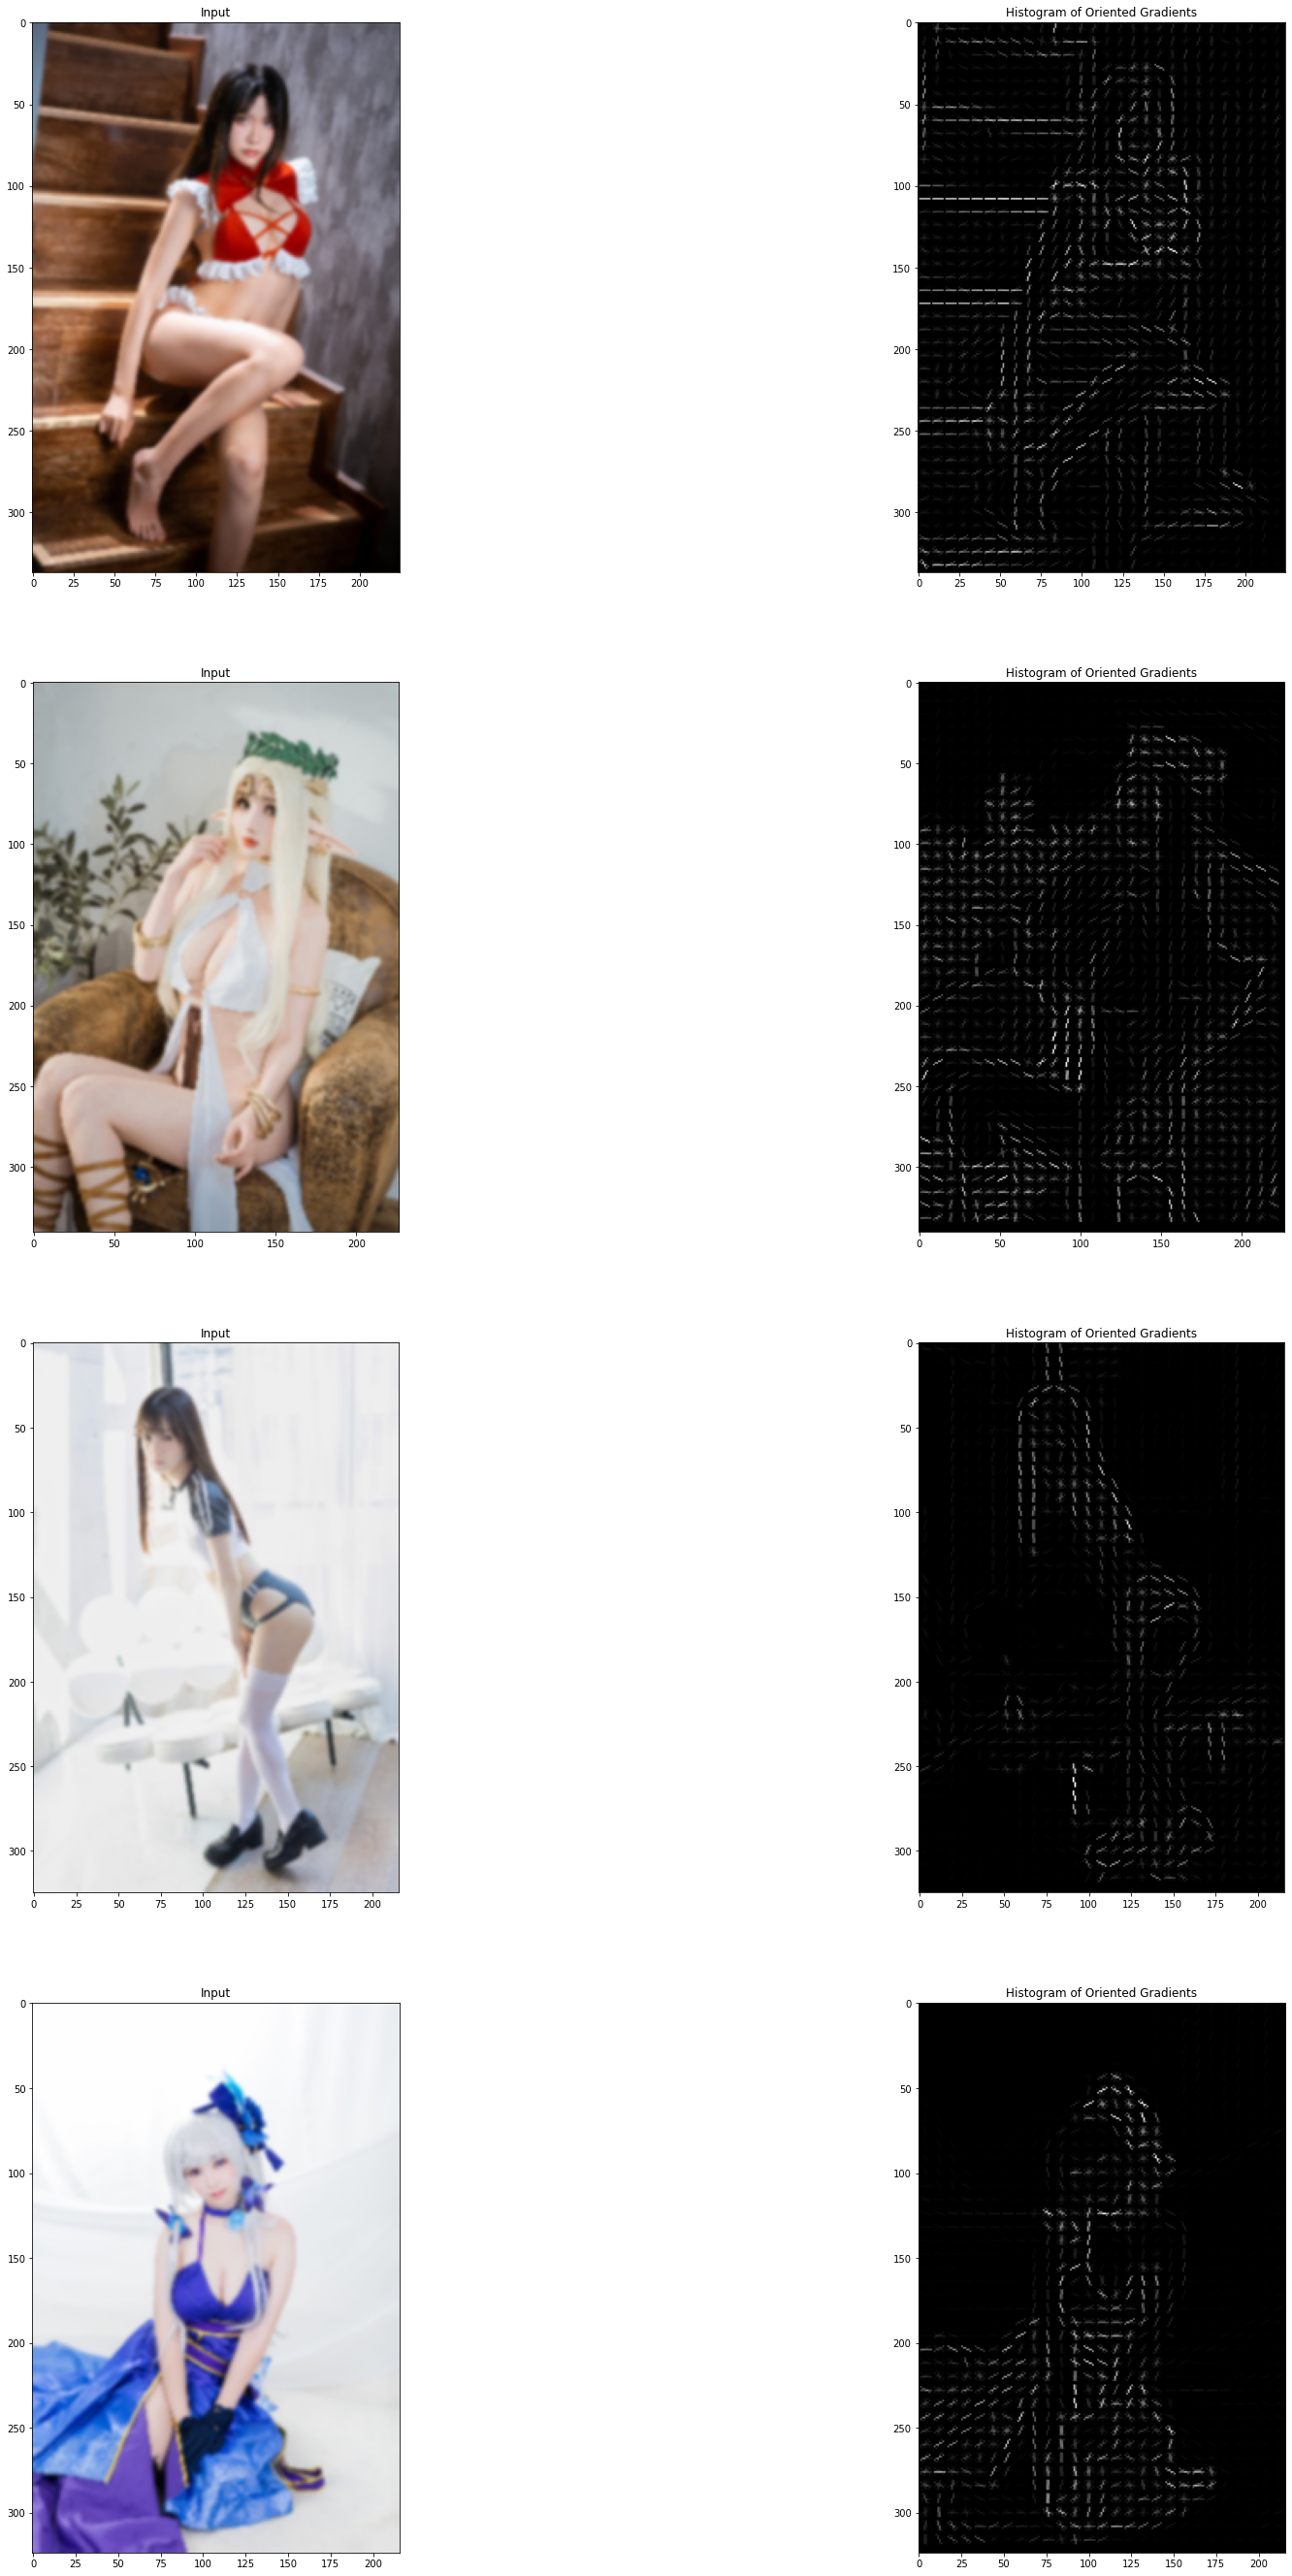

In [2]:
files = glob.glob("D:/work/Stuff/image_data_set_1/Original/*.jpg")
plt.rcParams['figure.figsize'] = [30, 48]

for i in range(0, 8, 2) :
    img = cv.imread(random.choice(files))
    img = cv.resize(img, (img.shape[1] // 6, img.shape[0] // 6))
    img = cv.GaussianBlur(img, (5, 5), 0)

    fd, hog_image = hog(img, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=True, multichannel=True)

    plt.subplot(4, 2, i + 1)
    plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
    plt.title("Input")
        
    plt.subplot(4, 2, i + 2)
    plt.imshow(hog_image, cmap="gray")
    plt.title("Histogram of Oriented Gradients")
        
plt.show()

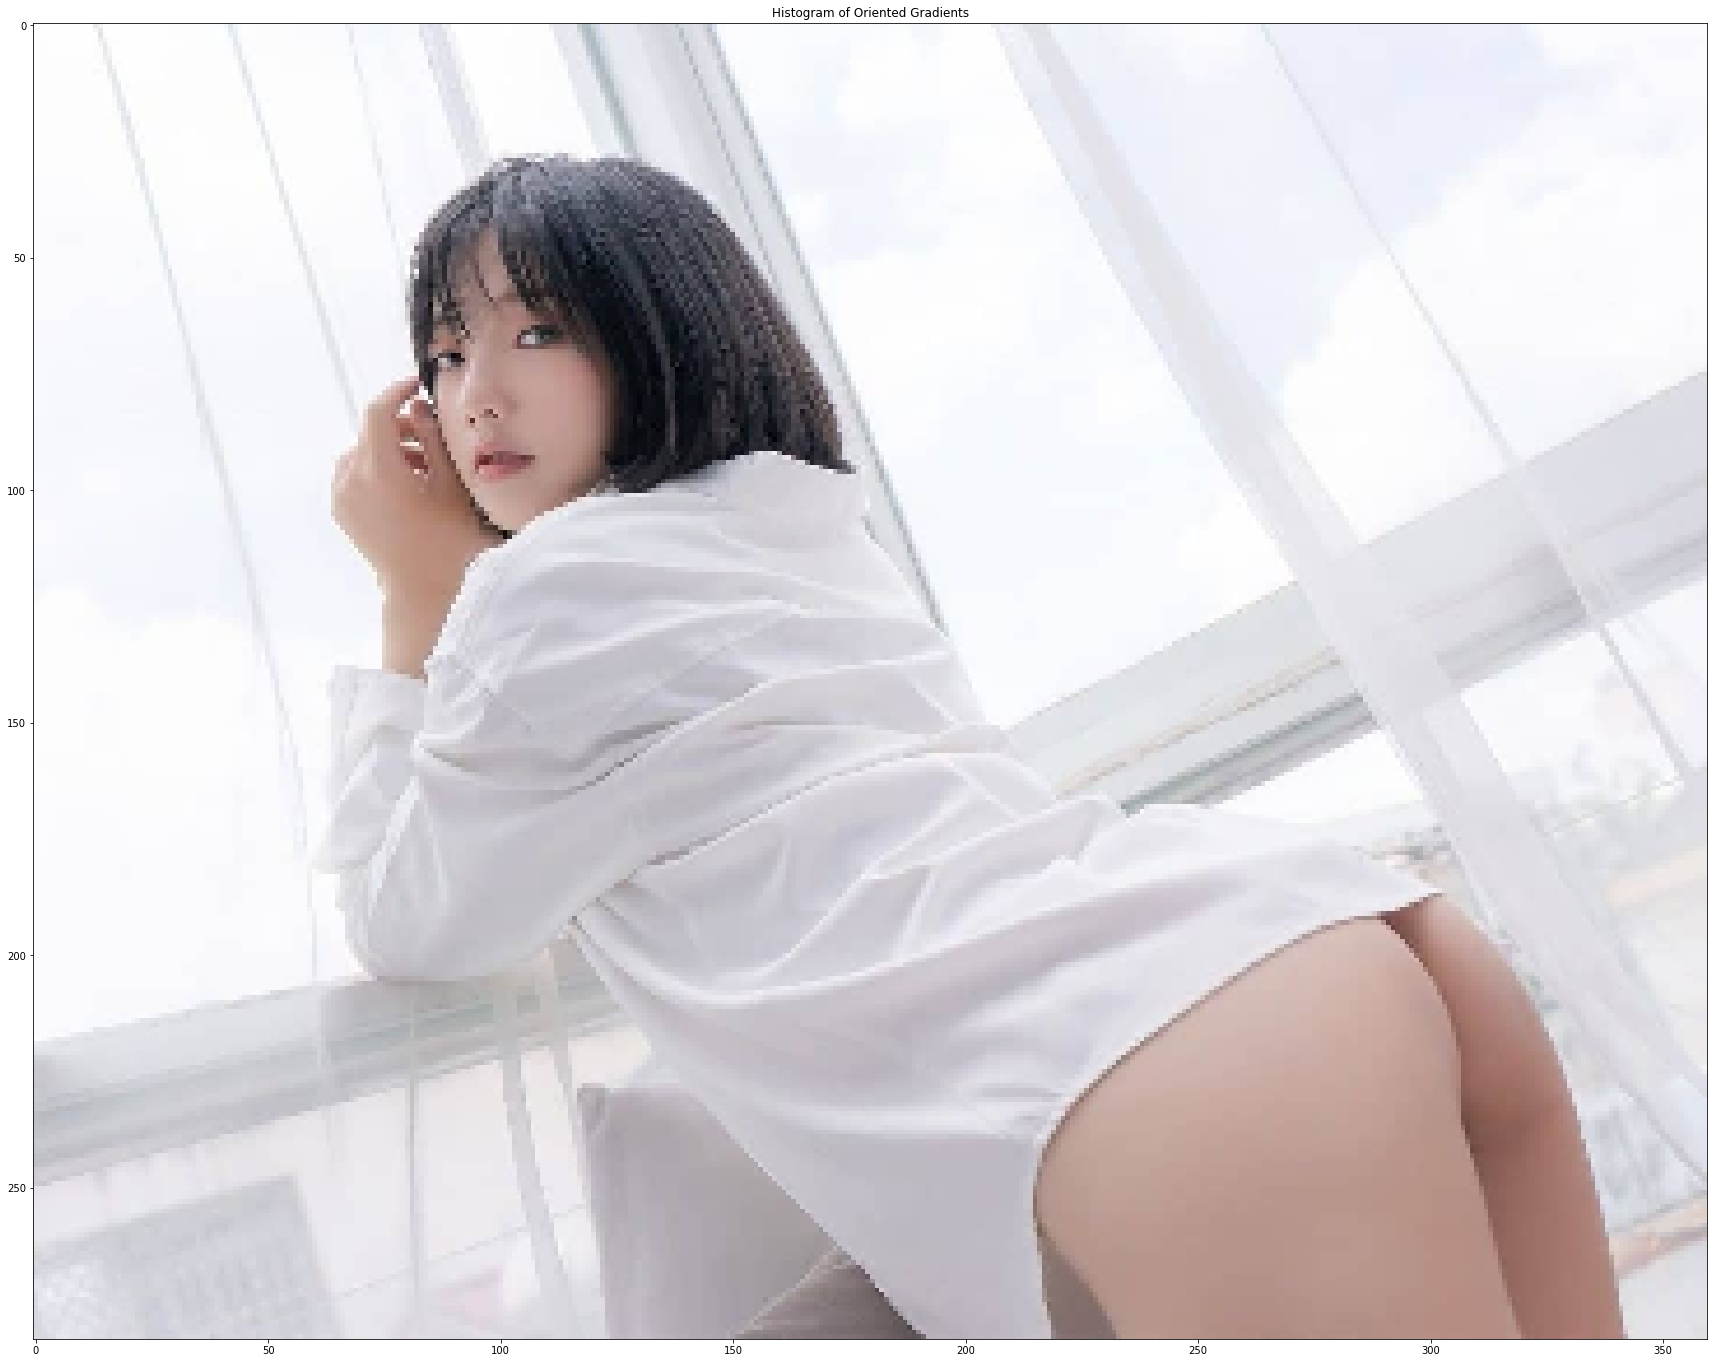

In [13]:
# img = cv.imread(random.choice(files))
img = cv.imread("image_temp/002.jpg")
img = cv.resize(img, (img.shape[1] // 3, img.shape[0] // 3))
# print(img.shape)
plt.rcParams['figure.figsize'] = [30, 48]
plt.subplot(1, 1, 1)
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.title("Histogram of Oriented Gradients")
        
plt.show()

In [14]:
# Define block size for subimage
# Blocks = [(40,20), (40, 30), (60, 20), (60,30), (60,40)]
Block_size = (40, 40)

#Define Stride
Stride = (7, 7)


# Define Sliding window position of row, column (Top left position)
posRow = np.arange(0, img.shape[0] - Block_size[0] + 1, Stride[0])
posCol = np.arange(0, img.shape[1] - Block_size[1] + 1, Stride[1])

# Create subimage feature
# Calculate HoG of each subimage in Sliding window 
hogfeatures = []

for i in posRow :
    for j in posCol :
        startH = i
        endH = i + Block_size[0]
        startW = j
        endW = j + Block_size[1]
        subImg = img[ startH:endH, startW:endW, :]
        blur = cv.GaussianBlur(subImg,(5,5),0) #Gaussian Filtering
        fd, hog_image = hog(blur, orientations=9, pixels_per_cell=(4, 4), cells_per_block=(2, 2), visualize=True, multichannel=True)
        hogfeatures.append(fd)
# print(hogfeatures)

[[1 1 1 ... 0 0 0]
 [1 1 1 ... 0 0 0]
 [1 1 1 ... 0 0 0]
 ...
 [0 0 0 ... 1 1 1]
 [0 0 0 ... 1 1 1]
 [0 0 0 ... 1 1 1]]


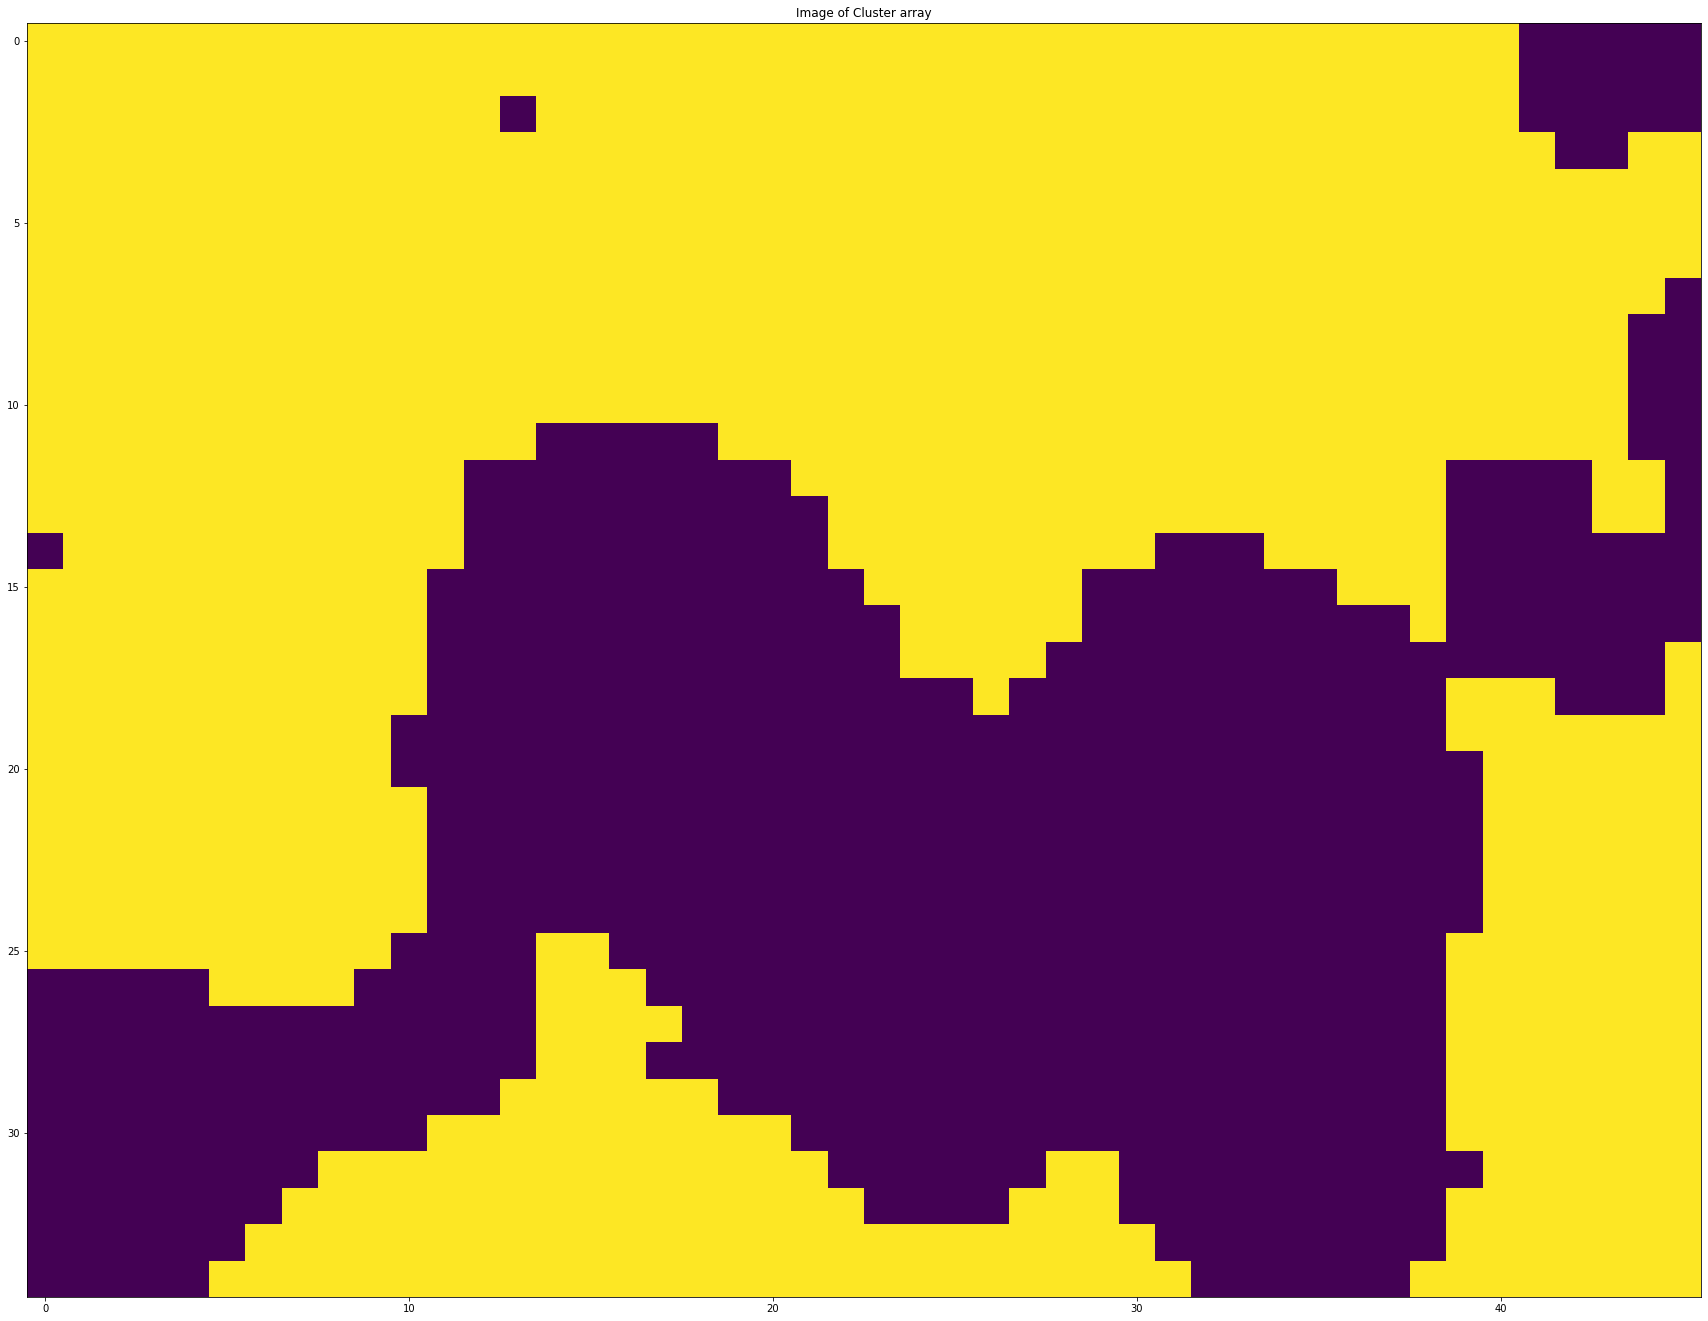

In [15]:
N = 2
kmeans = KMeans(n_clusters=N, random_state=0)
clusters = kmeans.fit_predict(hogfeatures)

# Reshape clusterID result to Grid
cluster_array = clusters.reshape(len(posRow), len(posCol))

# View cluster_array Result
print(cluster_array)

plt.rcParams['figure.figsize'] = [30, 48]
plt.subplot(1, 1, 1)
plt.imshow(cluster_array)
plt.title("Image of Cluster array")
        
plt.show()

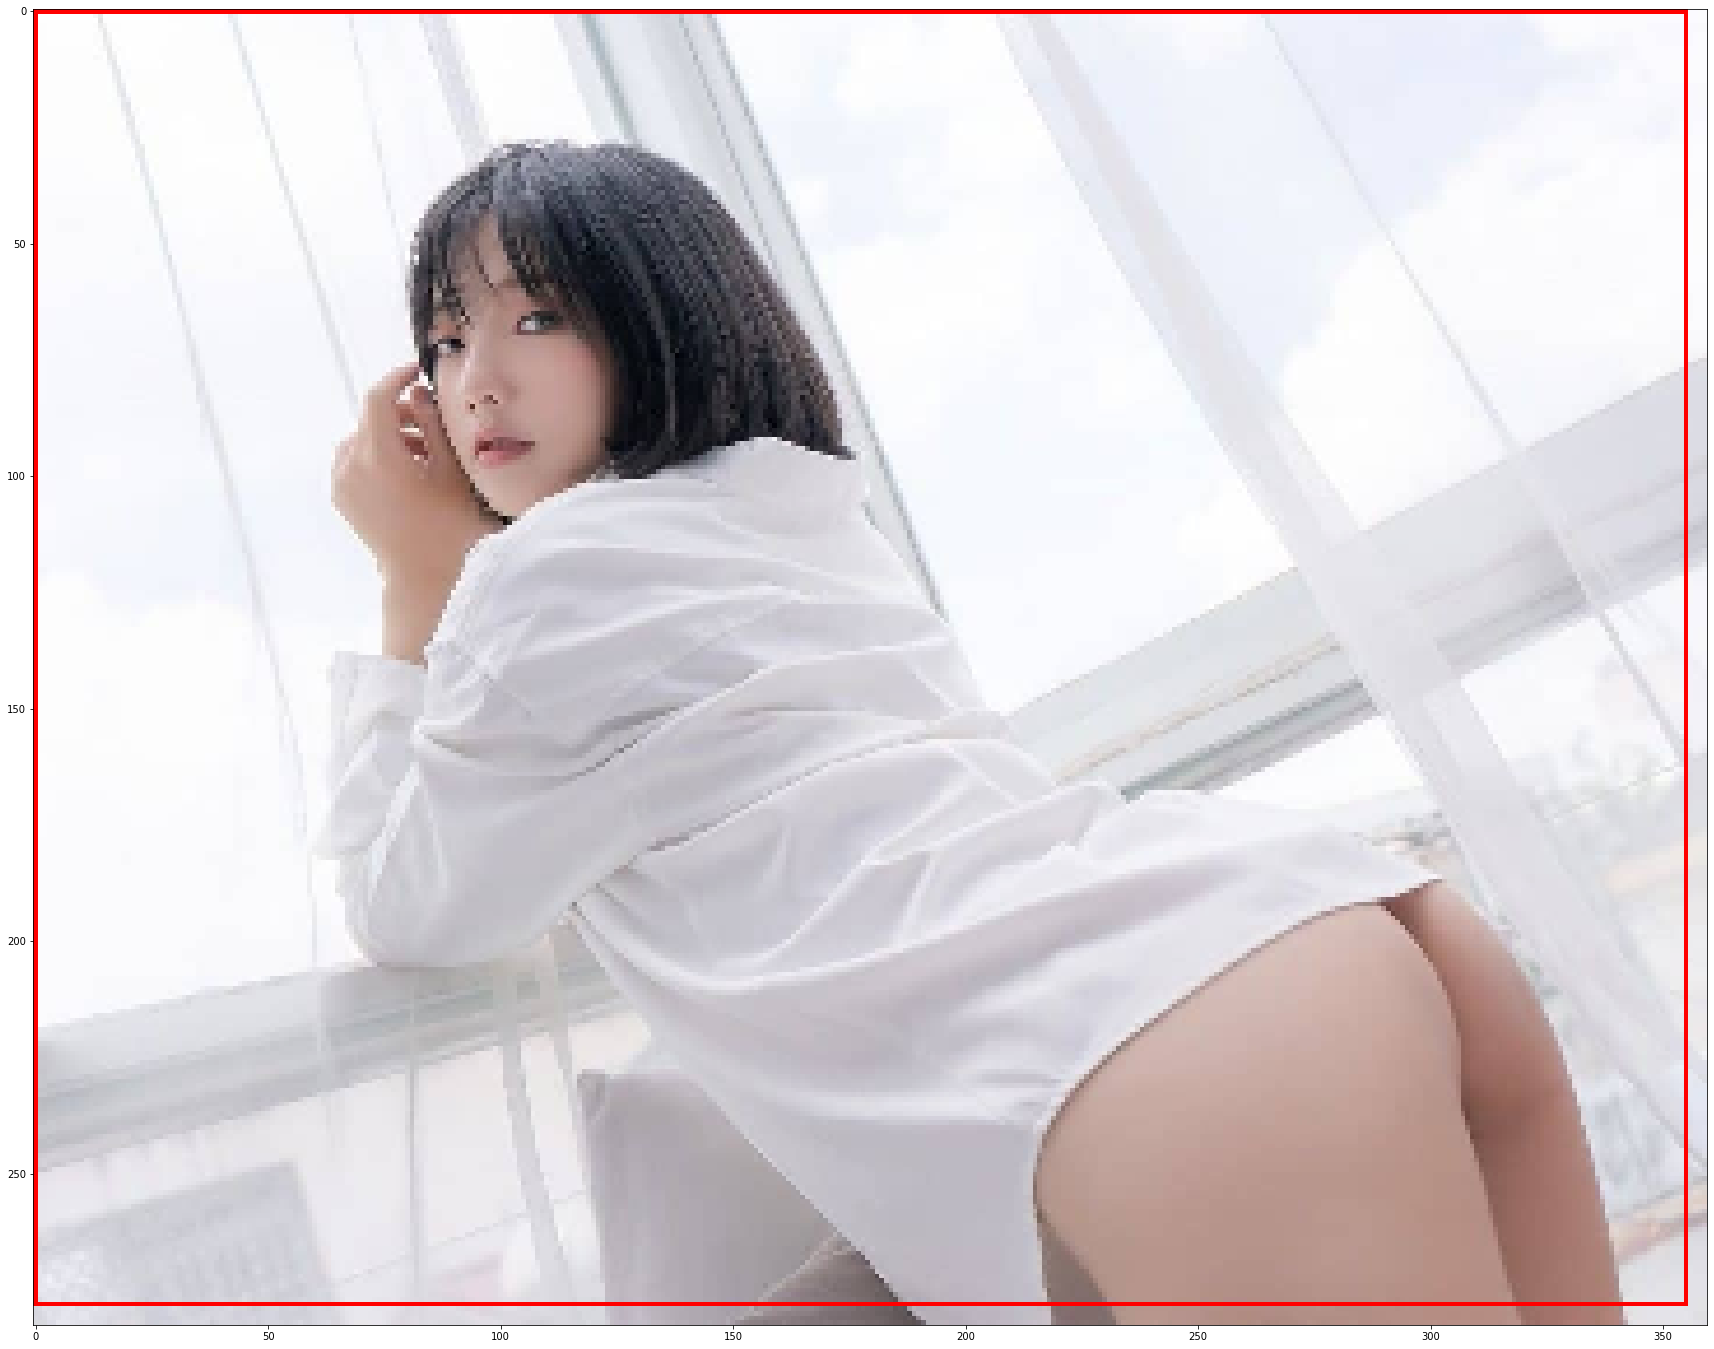

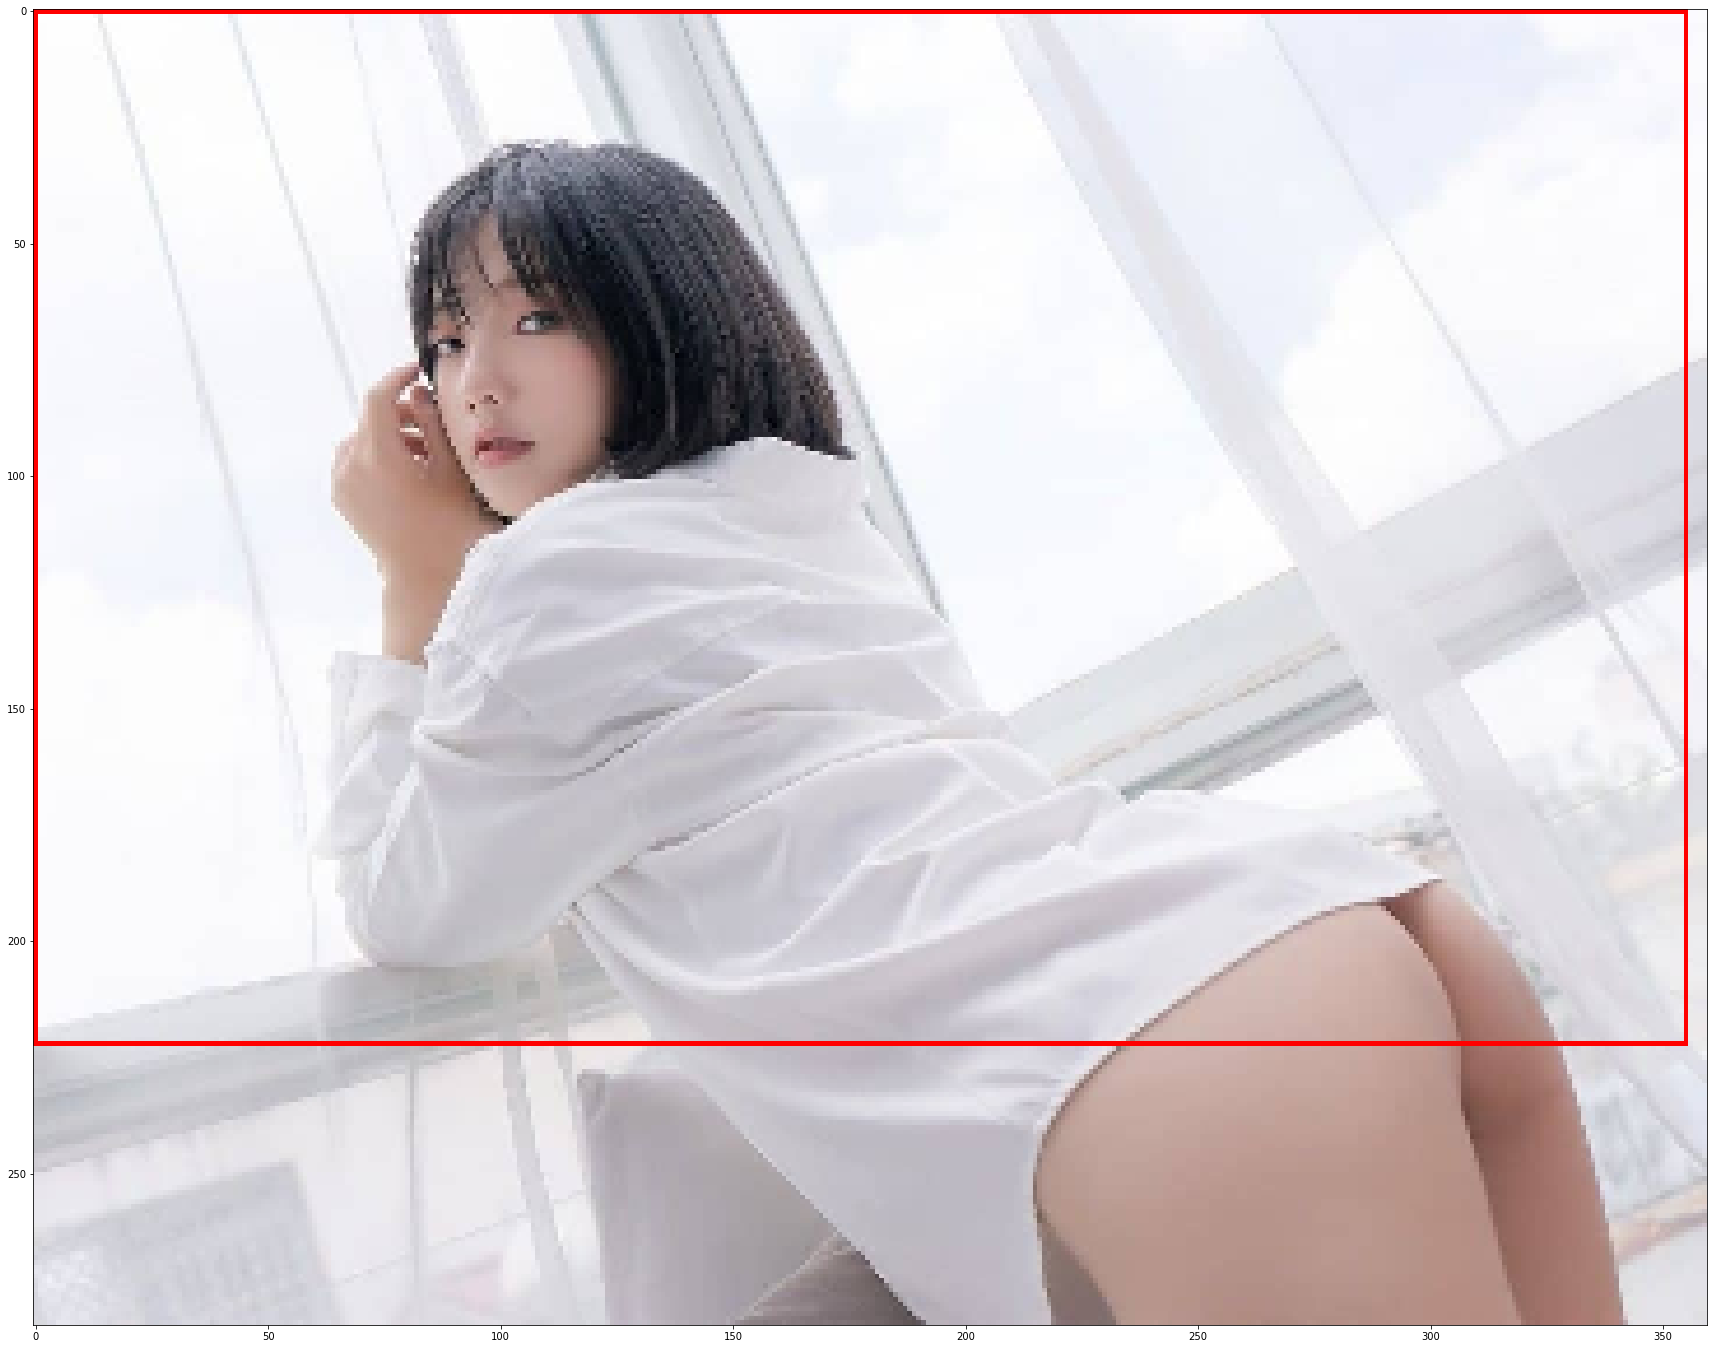

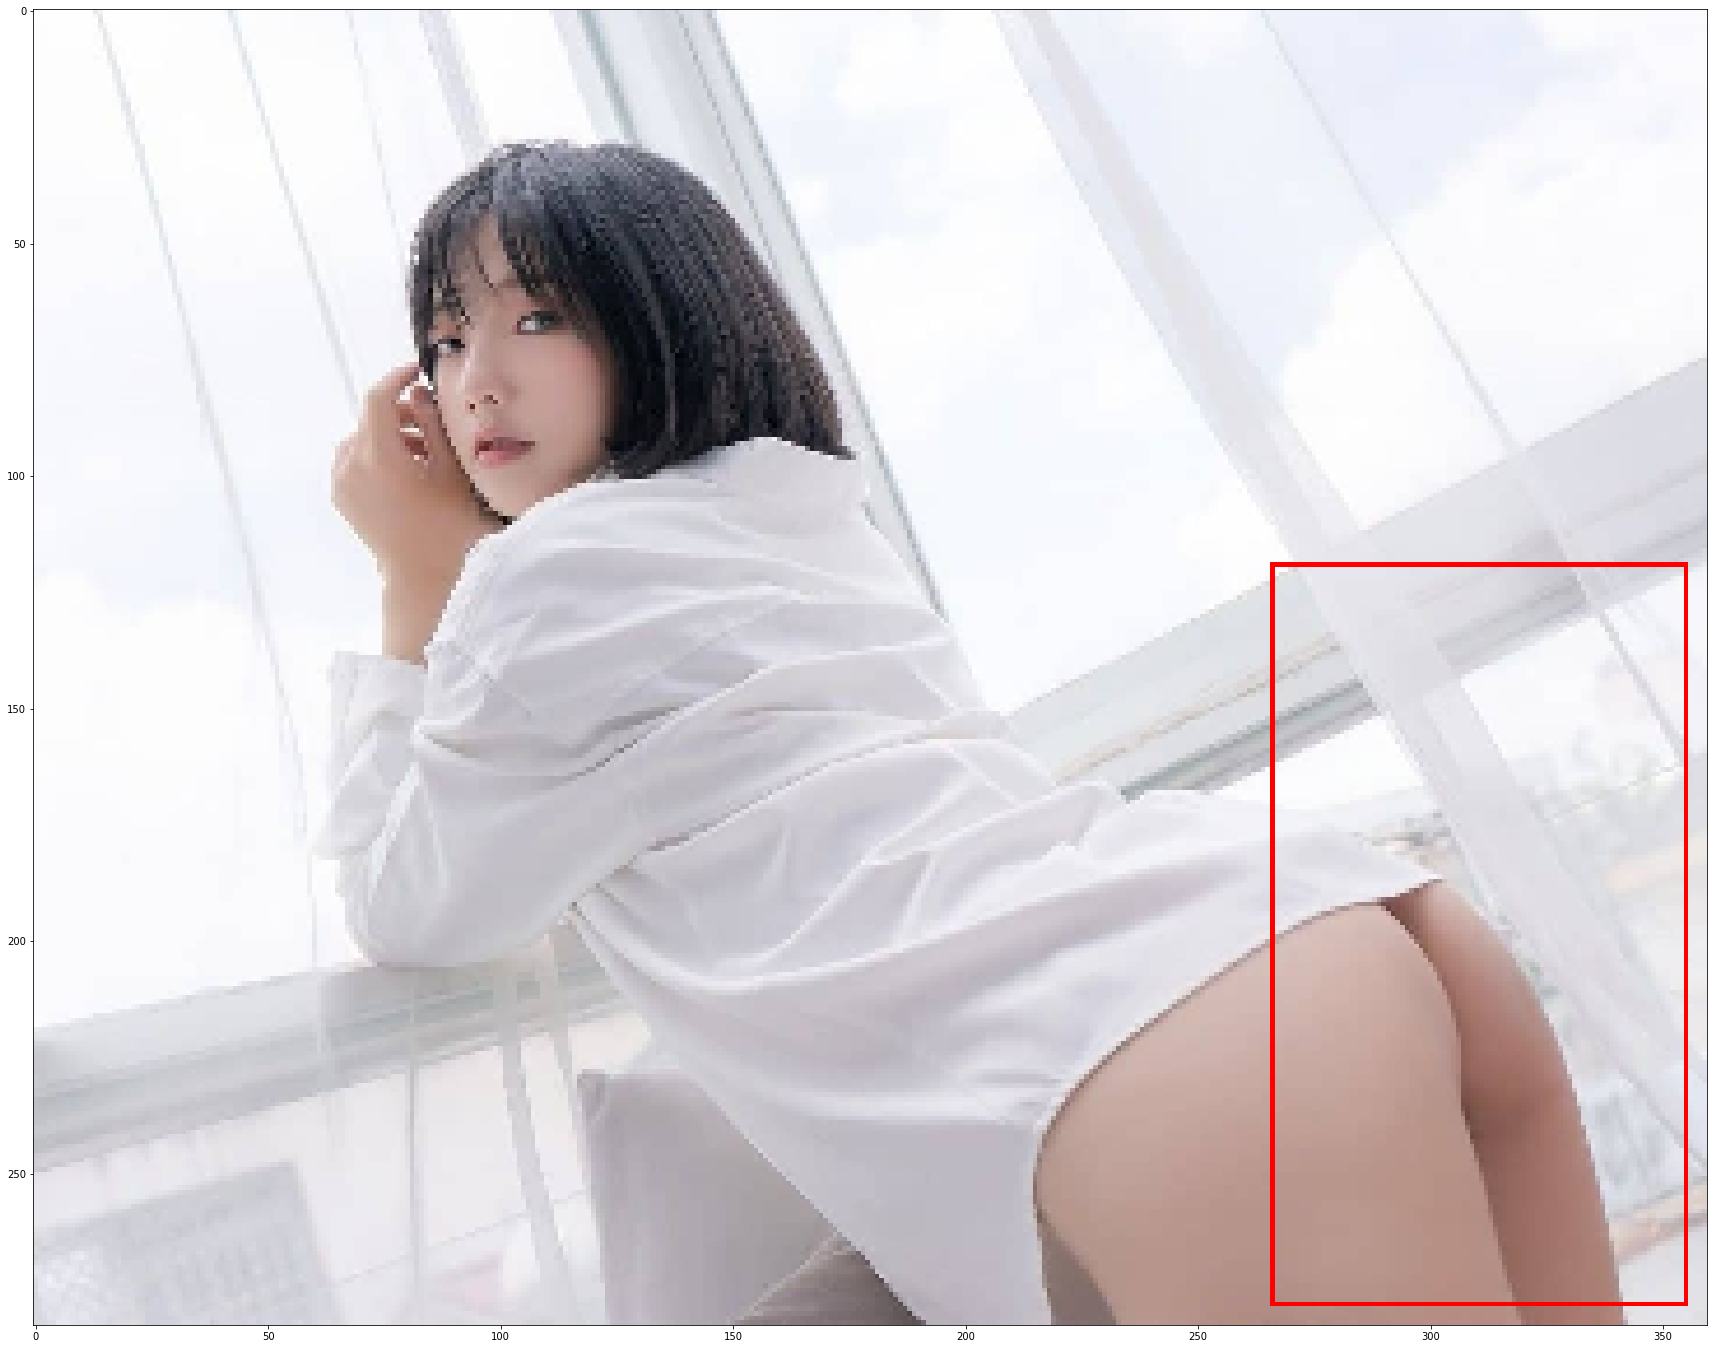

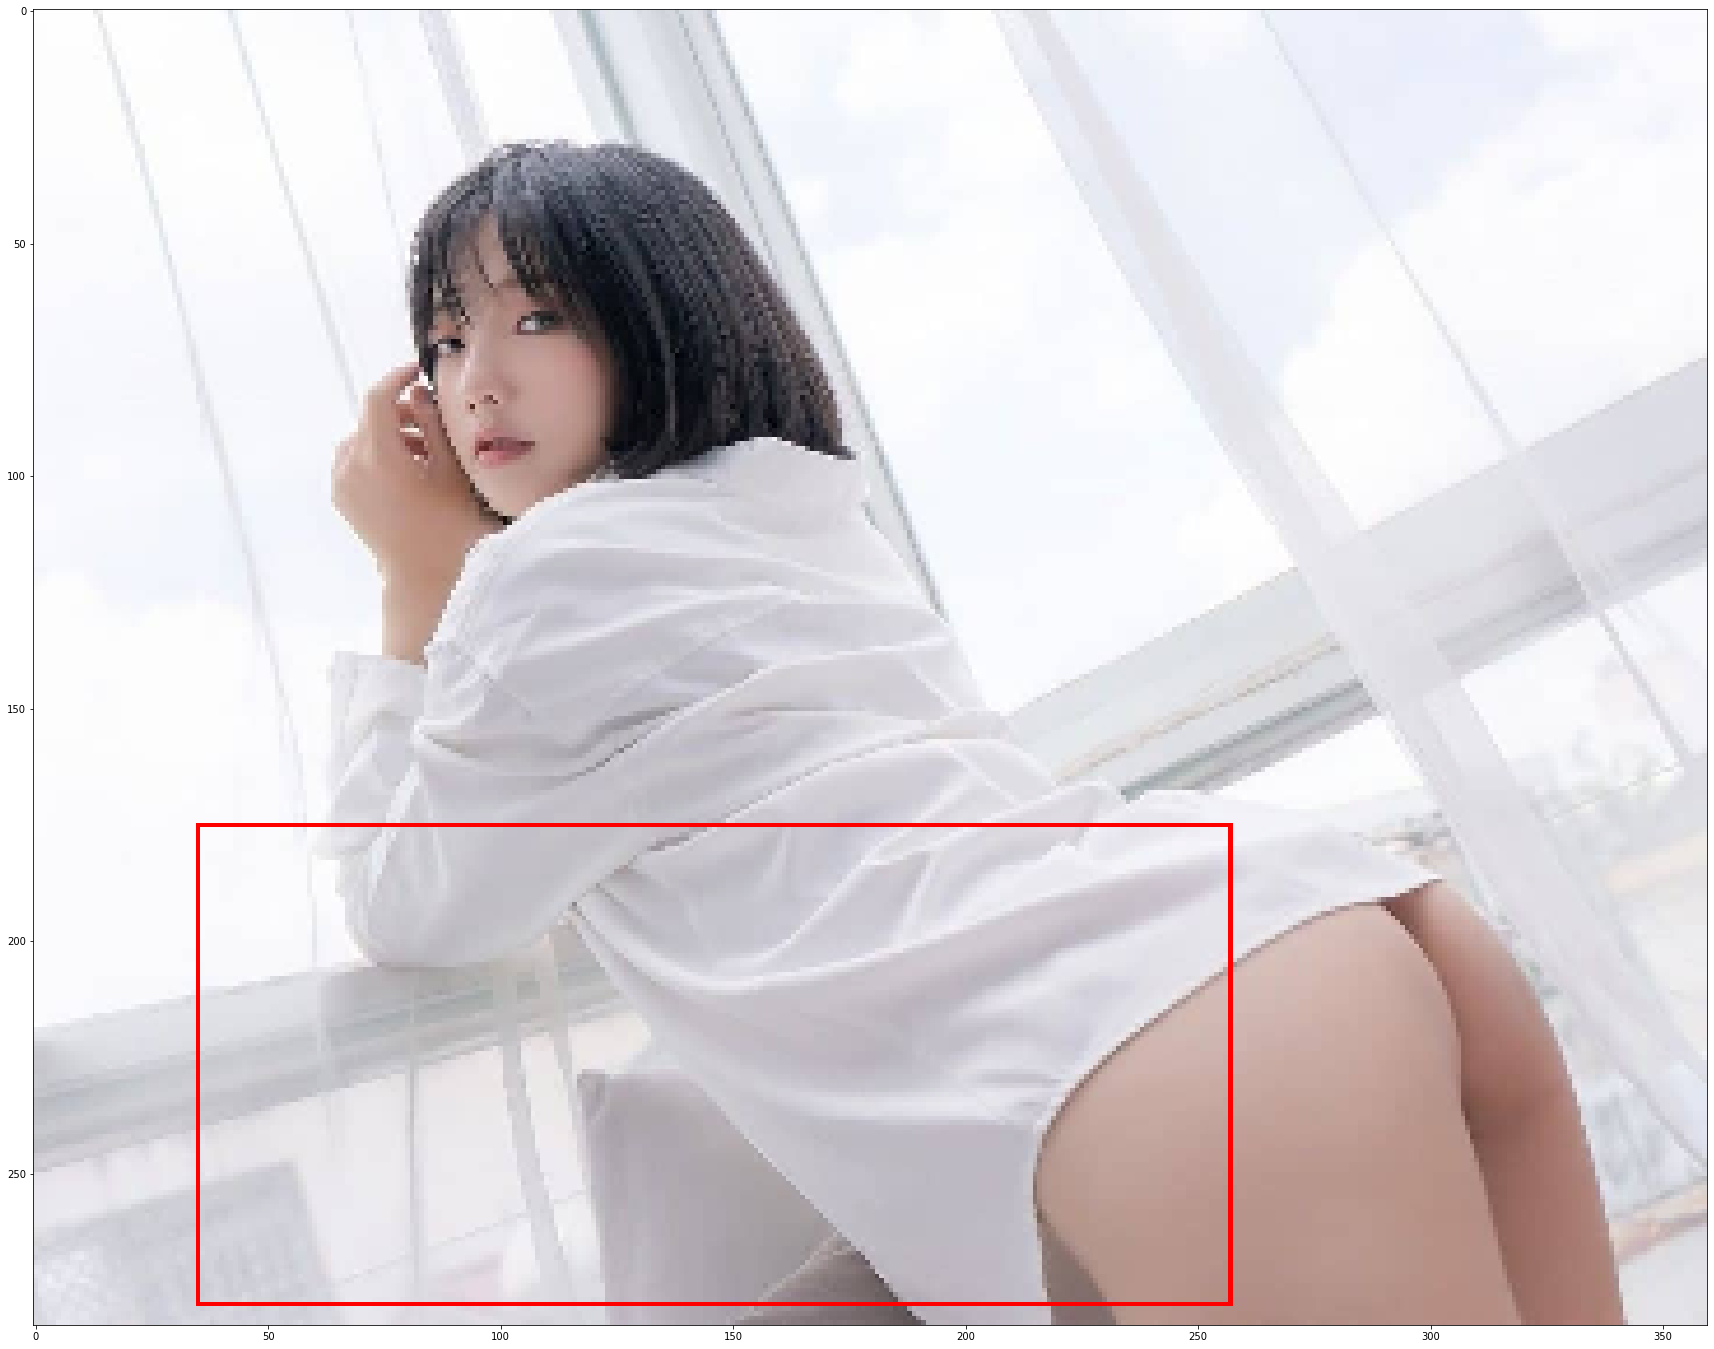

In [16]:
# ReAssign Label in case of multiple ROIs with the same clusterID
all_labels = label(cluster_array)

# Define bounding box parameter
Color = (0, 0, 255)
Thickness = 1

# ROI bounding box
nClass = np.unique(all_labels)
# print((len(nClass), 1, i))
plt.rcParams['figure.figsize'] = [30, len(nClass) * 48]

for i in range(len(nClass)) :
    #calculate from grid to actual position
    objPos = np.argwhere(all_labels == i)
    startBlockH = objPos[:,0].min()
    endBlockH = objPos[:,0].max()
    startBlockW = objPos[:,1].min()
    endBlockW = objPos[:,1].max()
    startF = (posCol[startBlockW], posRow[startBlockH])
    endF =(posCol[endBlockW] + Block_size[1], posRow[endBlockH] + Block_size[0])
    # draw regtangle boundary
    ROI_bounding_img = cv.rectangle(copy.copy(img), startF, endF, Color, Thickness)
    plt.subplot(1, 1, 1)
    plt.imshow(cv.cvtColor(ROI_bounding_img, cv.COLOR_BGR2RGB))
    plt.title("")
    plt.show()

